<a href="https://colab.research.google.com/github/EvaCidades/weightlifting-project/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv(r"C:\Users\catar\Downloads\pml-training.csv")

C:\Users\catar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
5,6,carlitos,1323084232,304277,05/12/2011 11:23,no,12,1.45,8.06,-94.4,...,0.02,-0.02,-0.03,193,203,-215,-9,660.0,478.0,A
6,7,carlitos,1323084232,368296,05/12/2011 11:23,no,12,1.42,8.09,-94.4,...,0.02,0.00,-0.02,195,205,-215,-18,659.0,470.0,A
7,8,carlitos,1323084232,440390,05/12/2011 11:23,no,12,1.42,8.13,-94.4,...,0.02,-0.02,0.00,193,205,-213,-9,660.0,474.0,A
8,9,carlitos,1323084232,484323,05/12/2011 11:23,no,12,1.43,8.16,-94.4,...,0.03,0.00,-0.02,193,204,-214,-16,653.0,476.0,A
9,10,carlitos,1323084232,484434,05/12/2011 11:23,no,12,1.45,8.17,-94.4,...,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0,A


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Columns: 160 entries, Unnamed: 0 to classe
dtypes: float64(94), int64(29), object(37)
memory usage: 24.0+ MB


In [0]:
df.describe()

,Unnamed: 0,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,19622.000000,1.962200e+04,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,...,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000
mean,9811.500000,1.322827e+09,500656.144277,430.640047,64.407197,0.305283,-11.205061,11.312608,-6.667241,12.923645,...,4639.849068,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745
std,5664.527827,2.049277e+05,288222.879958,247.909554,62.750255,22.351242,95.193926,7.742309,94.594252,8.005960,...,7284.972361,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747
min,1.000000,1.322490e+09,294.000000,1.000000,-28.900000,-55.800000,-180.000000,0.000000,-94.300000,3.000000,...,0.000000,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000
25%,4906.250000,1.322673e+09,252912.250000,222.000000,1.100000,1.760000,-88.300000,3.000000,-88.000000,5.000000,...,0.274550,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000
50%,9811.500000,1.322833e+09,496380.000000,424.000000,113.000000,5.280000,-13.000000,17.000000,-5.100000,18.000000,...,612.214225,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000
75%,14716.750000,1.323084e+09,751890.750000,644.000000,123.000000,14.900000,12.900000,18.000000,18.500000,19.000000,...,7368.414252,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000
max,19622.000000,1.323095e+09,998801.000000,864.000000,162.000000,60.300000,179.000000,29.000000,180.000000,30.000000,...,39009.333330,3.970000,311.000000,231.000000,477.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


In [0]:
dfTrain = df.iloc[:,7:160]

In [0]:
dfTrain

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,1.42,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,1.48,8.05,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,1.48,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
5,1.45,8.06,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,-0.02,-0.03,193,203,-215,-9,660.0,478.0,A
6,1.42,8.09,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.00,-0.02,195,205,-215,-18,659.0,470.0,A
7,1.42,8.13,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,-0.02,0.00,193,205,-213,-9,660.0,474.0,A
8,1.43,8.16,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.00,-0.02,193,204,-214,-16,653.0,476.0,A
9,1.45,8.17,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0,A


In [0]:
dfTrain.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,min_roll_belt,min_pitch_belt,amplitude_roll_belt,amplitude_pitch_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,...,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000
mean,64.407197,0.305283,-11.205061,11.312608,-6.667241,12.923645,-10.436453,10.756158,3.768941,2.167488,...,4639.849068,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745
std,62.750255,22.351242,95.193926,7.742309,94.594252,8.005960,93.616774,7.470908,25.258542,2.361529,...,7284.972361,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747
min,-28.900000,-55.800000,-180.000000,0.000000,-94.300000,3.000000,-180.000000,0.000000,0.000000,0.000000,...,0.000000,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000
25%,1.100000,1.760000,-88.300000,3.000000,-88.000000,5.000000,-88.400000,3.000000,0.300000,1.000000,...,0.274550,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000
50%,113.000000,5.280000,-13.000000,17.000000,-5.100000,18.000000,-7.850000,16.000000,1.000000,1.000000,...,612.214225,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000
75%,123.000000,14.900000,12.900000,18.000000,18.500000,19.000000,9.050000,17.000000,2.082500,2.000000,...,7368.414252,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000
max,162.000000,60.300000,179.000000,29.000000,180.000000,30.000000,173.000000,23.000000,360.000000,12.000000,...,39009.333330,3.970000,311.000000,231.000000,477.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


In [0]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Columns: 153 entries, roll_belt to classe
dtypes: float64(94), int64(25), object(34)
memory usage: 22.9+ MB


In [0]:
dfTraining = pd.DataFrame()
for column in dfTrain:
    if not dfTrain[column].isna().any():
        dfTraining[column] = dfTrain[column] 

In [0]:
dfTraining

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
5,1.45,8.06,-94.4,3,0.02,0.00,-0.02,-21,4,21,...,0.02,-0.02,-0.03,193,203,-215,-9,660.0,478.0,A
6,1.42,8.09,-94.4,3,0.02,0.00,-0.02,-22,3,21,...,0.02,0.00,-0.02,195,205,-215,-18,659.0,470.0,A
7,1.42,8.13,-94.4,3,0.02,0.00,-0.02,-22,4,21,...,0.02,-0.02,0.00,193,205,-213,-9,660.0,474.0,A
8,1.43,8.16,-94.4,3,0.02,0.00,-0.02,-20,2,24,...,0.03,0.00,-0.02,193,204,-214,-16,653.0,476.0,A
9,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,22,...,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0,A


In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
dfBelt = dfTraining.iloc [:, 0:13]

In [0]:
dfBelt

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z
0,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,-3,599,-313
1,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,-7,608,-311
2,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,-2,600,-305
3,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,-6,604,-310
4,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,-6,600,-302
5,1.45,8.06,-94.4,3,0.02,0.00,-0.02,-21,4,21,0,603,-312
6,1.42,8.09,-94.4,3,0.02,0.00,-0.02,-22,3,21,-4,599,-311
7,1.42,8.13,-94.4,3,0.02,0.00,-0.02,-22,4,21,-2,603,-313
8,1.43,8.16,-94.4,3,0.02,0.00,-0.02,-20,2,24,1,602,-312
9,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,22,-3,609,-308


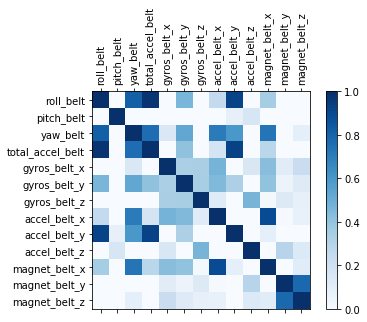

In [0]:
corr = dfBelt.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='Blues', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dfBelt.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfBelt.columns)
ax.set_yticklabels(dfBelt.columns)
plt.show()

In [0]:
dfArm = dfTraining.iloc [:, 13:26]

In [0]:
dfArm

,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z
0,-128.0,22.50,-161.0,34,0.00,0.00,-0.02,-288,109,-123,-368,337,516
1,-128.0,22.50,-161.0,34,0.02,-0.02,-0.02,-290,110,-125,-369,337,513
2,-128.0,22.50,-161.0,34,0.02,-0.02,-0.02,-289,110,-126,-368,344,513
3,-128.0,22.10,-161.0,34,0.02,-0.03,0.02,-289,111,-123,-372,344,512
4,-128.0,22.10,-161.0,34,0.00,-0.03,0.00,-289,111,-123,-374,337,506
5,-128.0,22.00,-161.0,34,0.02,-0.03,0.00,-289,111,-122,-369,342,513
6,-128.0,21.90,-161.0,34,0.00,-0.03,0.00,-289,111,-125,-373,336,509
7,-128.0,21.80,-161.0,34,0.02,-0.02,0.00,-289,111,-124,-372,338,510
8,-128.0,21.70,-161.0,34,0.02,-0.03,-0.02,-288,109,-122,-369,341,518
9,-128.0,21.60,-161.0,34,0.02,-0.03,-0.02,-288,110,-124,-376,334,516


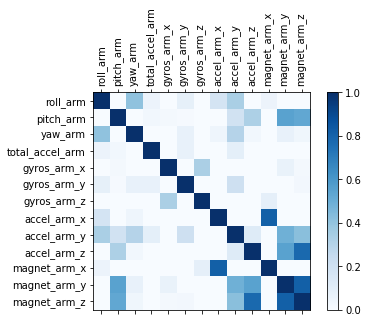

In [0]:
corr = dfArm.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='Blues', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dfArm.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfArm.columns)
ax.set_yticklabels(dfArm.columns)
plt.show()

In [0]:
dfDumbbell = dfTraining.iloc [:, 26:39]

In [0]:
dfDumbbell

,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z
0,13.052175,-70.494004,-84.873939,37,0.00,-0.02,0.00,-234,47,-271,-559,293,-65.0
1,13.130740,-70.637505,-84.710647,37,0.00,-0.02,0.00,-233,47,-269,-555,296,-64.0
2,12.850750,-70.278120,-85.140781,37,0.00,-0.02,0.00,-232,46,-270,-561,298,-63.0
3,13.431200,-70.393795,-84.873626,37,0.00,-0.02,-0.02,-232,48,-269,-552,303,-60.0
4,13.378716,-70.428560,-84.853057,37,0.00,-0.02,0.00,-233,48,-270,-554,292,-68.0
5,13.382459,-70.817588,-84.465003,37,0.00,-0.02,0.00,-234,48,-269,-558,294,-66.0
6,13.126949,-70.247569,-85.099613,37,0.00,-0.02,0.00,-232,47,-270,-551,295,-70.0
7,12.750830,-70.347684,-85.097082,37,0.00,-0.02,0.00,-234,46,-272,-555,300,-74.0
8,13.154634,-70.425204,-84.915634,37,0.00,-0.02,0.00,-232,47,-269,-549,292,-65.0
9,13.330337,-70.850588,-84.446020,37,0.00,-0.02,0.00,-235,48,-270,-558,291,-69.0


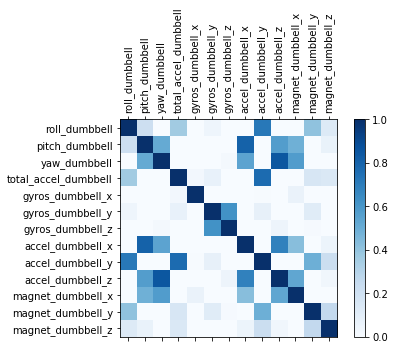

In [0]:
corr = dfDumbbell.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='Blues', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dfDumbbell.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfDumbbell.columns)
ax.set_yticklabels(dfDumbbell.columns)
plt.show()

In [0]:
dfForearm = dfTraining.iloc [:, 39:52] 

In [0]:
dfForearm

,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,28.4,-63.9,-153.0,36,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0
1,28.3,-63.9,-153.0,36,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0
2,28.3,-63.9,-152.0,36,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0
3,28.1,-63.9,-152.0,36,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0
4,28.0,-63.9,-152.0,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0
5,27.9,-63.9,-152.0,36,0.02,-0.02,-0.03,193,203,-215,-9,660.0,478.0
6,27.9,-63.9,-152.0,36,0.02,0.00,-0.02,195,205,-215,-18,659.0,470.0
7,27.8,-63.8,-152.0,36,0.02,-0.02,0.00,193,205,-213,-9,660.0,474.0
8,27.7,-63.8,-152.0,36,0.03,0.00,-0.02,193,204,-214,-16,653.0,476.0
9,27.7,-63.8,-152.0,36,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0


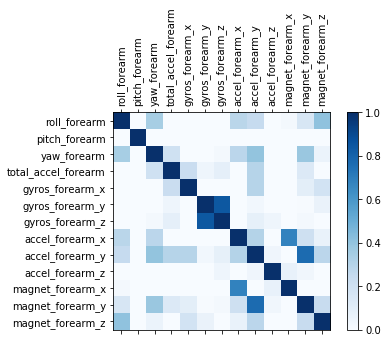

In [0]:
corr = dfForearm.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='Blues', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dfForearm.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfForearm.columns)
ax.set_yticklabels(dfForearm.columns)
plt.show()

In [0]:
Y = dfTraining['classe']

In [0]:
Y

0        A
1        A
2        A
3        A
4        A
5        A
6        A
7        A
8        A
9        A
10       A
11       A
12       A
13       A
14       A
15       A
16       A
17       A
18       A
19       A
20       A
21       A
22       A
23       A
24       A
25       A
26       A
27       A
28       A
29       A
        ..
19592    E
19593    E
19594    E
19595    E
19596    E
19597    E
19598    E
19599    E
19600    E
19601    E
19602    E
19603    E
19604    E
19605    E
19606    E
19607    E
19608    E
19609    E
19610    E
19611    E
19612    E
19613    E
19614    E
19615    E
19616    E
19617    E
19618    E
19619    E
19620    E
19621    E
Name: classe, Length: 19622, dtype: object

In [0]:
X = dfTraining.iloc[:,0:52]

In [0]:
X

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,...,36,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0
1,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,...,36,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0
2,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,...,36,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0
3,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,...,36,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0
4,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,...,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0
5,1.45,8.06,-94.4,3,0.02,0.00,-0.02,-21,4,21,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660.0,478.0
6,1.42,8.09,-94.4,3,0.02,0.00,-0.02,-22,3,21,...,36,0.02,0.00,-0.02,195,205,-215,-18,659.0,470.0
7,1.42,8.13,-94.4,3,0.02,0.00,-0.02,-22,4,21,...,36,0.02,-0.02,0.00,193,205,-213,-9,660.0,474.0
8,1.43,8.16,-94.4,3,0.02,0.00,-0.02,-20,2,24,...,36,0.03,0.00,-0.02,193,204,-214,-16,653.0,476.0
9,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,22,...,36,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size = 0.2, random_state = 50)

In [0]:
for i, v in y_train.items():
    print('index: ', i, 'value: ', v, 'num:',ord(v)) 
    y_train[i]=ord(v)

index:  16050 value:  E num: 69
index:  15018 value:  D num: 68
index:  15840 value:  D num: 68
index:  7243 value:  B num: 66
index:  2023 value:  A num: 65
index:  7590 value:  B num: 66
index:  3005 value:  A num: 65
index:  286 value:  A num: 65
index:  5208 value:  A num: 65
index:  19127 value:  E num: 69
index:  2326 value:  A num: 65
index:  13886 value:  D num: 68
index:  10528 value:  C num: 67
index:  1255 value:  A num: 65
index:  1964 value:  A num: 65
index:  12895 value:  D num: 68
index:  11664 value:  C num: 67
index:  1120 value:  A num: 65
index:  5711 value:  B num: 66
index:  8360 value:  B num: 66
index:  4212 value:  A num: 65
index:  2075 value:  A num: 65
index:  8194 value:  B num: 66
index:  5777 value:  B num: 66
index:  9255 value:  B num: 66
index:  8447 value:  B num: 66
index:  1342 value:  A num: 65
index:  3834 value:  A num: 65
index:  6954 value:  B num: 66
index:  18368 value:  E num: 69
index:  16443 value:  E num: 69
index:  7302 value:  B num: 66

index:  13022 value:  D num: 68
index:  3721 value:  A num: 65
index:  17450 value:  E num: 69
index:  14747 value:  D num: 68
index:  19423 value:  E num: 69
index:  8641 value:  B num: 66
index:  8464 value:  B num: 66
index:  15451 value:  D num: 68
index:  13878 value:  D num: 68
index:  3813 value:  A num: 65
index:  15215 value:  D num: 68
index:  3337 value:  A num: 65
index:  4446 value:  A num: 65
index:  5510 value:  A num: 65
index:  15996 value:  D num: 68
index:  3562 value:  A num: 65
index:  3130 value:  A num: 65
index:  6248 value:  B num: 66
index:  15819 value:  D num: 68
index:  14991 value:  D num: 68
index:  14831 value:  D num: 68
index:  19336 value:  E num: 69
index:  18768 value:  E num: 69
index:  736 value:  A num: 65
index:  2894 value:  A num: 65
index:  8485 value:  B num: 66
index:  7173 value:  B num: 66
index:  13830 value:  D num: 68
index:  11464 value:  C num: 67
index:  723 value:  A num: 65
index:  12890 value:  D num: 68
index:  12481 value:  C n

index:  1494 value:  A num: 65
index:  5737 value:  B num: 66
index:  6711 value:  B num: 66
index:  10543 value:  C num: 67
index:  2000 value:  A num: 65
index:  1514 value:  A num: 65
index:  13615 value:  D num: 68
index:  12626 value:  C num: 67
index:  11605 value:  C num: 67
index:  5781 value:  B num: 66
index:  13574 value:  D num: 68
index:  13144 value:  D num: 68
index:  5323 value:  A num: 65
index:  2043 value:  A num: 65
index:  15791 value:  D num: 68
index:  4928 value:  A num: 65
index:  19310 value:  E num: 69
index:  12459 value:  C num: 67
index:  10377 value:  C num: 67
index:  8112 value:  B num: 66
index:  9560 value:  C num: 67
index:  9229 value:  B num: 66
index:  4482 value:  A num: 65
index:  15280 value:  D num: 68
index:  15788 value:  D num: 68
index:  7522 value:  B num: 66
index:  18708 value:  E num: 69
index:  10790 value:  C num: 67
index:  18318 value:  E num: 69
index:  6824 value:  B num: 66
index:  7802 value:  B num: 66
index:  10243 value:  C 

index:  3357 value:  A num: 65
index:  5040 value:  A num: 65
index:  4742 value:  A num: 65
index:  18325 value:  E num: 69
index:  13510 value:  D num: 68
index:  5795 value:  B num: 66
index:  12042 value:  C num: 67
index:  15712 value:  D num: 68
index:  551 value:  A num: 65
index:  13812 value:  D num: 68
index:  11981 value:  C num: 67
index:  6951 value:  B num: 66
index:  19592 value:  E num: 69
index:  18209 value:  E num: 69
index:  13277 value:  D num: 68
index:  11040 value:  C num: 67
index:  2340 value:  A num: 65
index:  7720 value:  B num: 66
index:  6144 value:  B num: 66
index:  9169 value:  B num: 66
index:  2380 value:  A num: 65
index:  859 value:  A num: 65
index:  13044 value:  D num: 68
index:  2969 value:  A num: 65
index:  14439 value:  D num: 68
index:  19301 value:  E num: 69
index:  16396 value:  E num: 69
index:  5559 value:  A num: 65
index:  6037 value:  B num: 66
index:  917 value:  A num: 65
index:  6258 value:  B num: 66
index:  15771 value:  D num:

index:  12363 value:  C num: 67
index:  883 value:  A num: 65
index:  17308 value:  E num: 69
index:  14401 value:  D num: 68
index:  2512 value:  A num: 65
index:  14563 value:  D num: 68
index:  9436 value:  C num: 67
index:  788 value:  A num: 65
index:  15837 value:  D num: 68
index:  3355 value:  A num: 65
index:  1739 value:  A num: 65
index:  2956 value:  A num: 65
index:  3375 value:  A num: 65
index:  2139 value:  A num: 65
index:  19003 value:  E num: 69
index:  9876 value:  C num: 67
index:  3121 value:  A num: 65
index:  7458 value:  B num: 66
index:  11608 value:  C num: 67
index:  7532 value:  B num: 66
index:  1068 value:  A num: 65
index:  12565 value:  C num: 67
index:  13225 value:  D num: 68
index:  17006 value:  E num: 69
index:  12941 value:  D num: 68
index:  589 value:  A num: 65
index:  6729 value:  B num: 66
index:  2515 value:  A num: 65
index:  15240 value:  D num: 68
index:  12993 value:  D num: 68
index:  13805 value:  D num: 68
index:  7232 value:  B num: 

index:  15887 value:  D num: 68
index:  7912 value:  B num: 66
index:  2513 value:  A num: 65
index:  18065 value:  E num: 69
index:  1379 value:  A num: 65
index:  8753 value:  B num: 66
index:  16092 value:  E num: 69
index:  16125 value:  E num: 69
index:  4236 value:  A num: 65
index:  15355 value:  D num: 68
index:  8152 value:  B num: 66
index:  14133 value:  D num: 68
index:  1831 value:  A num: 65
index:  11809 value:  C num: 67
index:  17189 value:  E num: 69
index:  16257 value:  E num: 69
index:  4715 value:  A num: 65
index:  9542 value:  C num: 67
index:  19330 value:  E num: 69
index:  12550 value:  C num: 67
index:  10844 value:  C num: 67
index:  16033 value:  E num: 69
index:  18192 value:  E num: 69
index:  11011 value:  C num: 67
index:  1073 value:  A num: 65
index:  15195 value:  D num: 68
index:  11345 value:  C num: 67
index:  19387 value:  E num: 69
index:  3583 value:  A num: 65
index:  8473 value:  B num: 66
index:  9598 value:  C num: 67
index:  5797 value:  

index:  9506 value:  C num: 67
index:  13554 value:  D num: 68
index:  4576 value:  A num: 65
index:  15037 value:  D num: 68
index:  13274 value:  D num: 68
index:  6182 value:  B num: 66
index:  836 value:  A num: 65
index:  15641 value:  D num: 68
index:  2421 value:  A num: 65
index:  18248 value:  E num: 69
index:  4905 value:  A num: 65
index:  7137 value:  B num: 66
index:  13523 value:  D num: 68
index:  9174 value:  B num: 66
index:  18302 value:  E num: 69
index:  13267 value:  D num: 68
index:  19369 value:  E num: 69
index:  2866 value:  A num: 65
index:  12176 value:  C num: 67
index:  17978 value:  E num: 69
index:  14105 value:  D num: 68
index:  11725 value:  C num: 67
index:  6001 value:  B num: 66
index:  3422 value:  A num: 65
index:  3453 value:  A num: 65
index:  7538 value:  B num: 66
index:  4695 value:  A num: 65
index:  14213 value:  D num: 68
index:  14648 value:  D num: 68
index:  18191 value:  E num: 69
index:  17023 value:  E num: 69
index:  12962 value:  D

index:  17104 value:  E num: 69
index:  11408 value:  C num: 67
index:  10483 value:  C num: 67
index:  6898 value:  B num: 66
index:  16331 value:  E num: 69
index:  11125 value:  C num: 67
index:  8724 value:  B num: 66
index:  3127 value:  A num: 65
index:  9289 value:  B num: 66
index:  13706 value:  D num: 68
index:  14076 value:  D num: 68
index:  116 value:  A num: 65
index:  17108 value:  E num: 69
index:  9700 value:  C num: 67
index:  4940 value:  A num: 65
index:  2013 value:  A num: 65
index:  11965 value:  C num: 67
index:  9421 value:  C num: 67
index:  2994 value:  A num: 65
index:  6189 value:  B num: 66
index:  16757 value:  E num: 69
index:  14131 value:  D num: 68
index:  5910 value:  B num: 66
index:  8073 value:  B num: 66
index:  13178 value:  D num: 68
index:  16247 value:  E num: 69
index:  6828 value:  B num: 66
index:  9877 value:  C num: 67
index:  17185 value:  E num: 69
index:  12248 value:  C num: 67
index:  6923 value:  B num: 66
index:  9655 value:  C nu

index:  17715 value:  E num: 69
index:  10130 value:  C num: 67
index:  5549 value:  A num: 65
index:  17777 value:  E num: 69
index:  4681 value:  A num: 65
index:  5202 value:  A num: 65
index:  18633 value:  E num: 69
index:  17566 value:  E num: 69
index:  2228 value:  A num: 65
index:  6123 value:  B num: 66
index:  12031 value:  C num: 67
index:  9016 value:  B num: 66
index:  13764 value:  D num: 68
index:  16584 value:  E num: 69
index:  12741 value:  C num: 67
index:  3837 value:  A num: 65
index:  6032 value:  B num: 66
index:  9370 value:  B num: 66
index:  17609 value:  E num: 69
index:  13883 value:  D num: 68
index:  7956 value:  B num: 66
index:  5594 value:  B num: 66
index:  18497 value:  E num: 69
index:  5080 value:  A num: 65
index:  3015 value:  A num: 65
index:  18316 value:  E num: 69
index:  18018 value:  E num: 69
index:  17817 value:  E num: 69
index:  6015 value:  B num: 66
index:  19191 value:  E num: 69
index:  563 value:  A num: 65
index:  7217 value:  B n

index:  11220 value:  C num: 67
index:  11632 value:  C num: 67
index:  11961 value:  C num: 67
index:  7680 value:  B num: 66
index:  5354 value:  A num: 65
index:  13572 value:  D num: 68
index:  4324 value:  A num: 65
index:  13382 value:  D num: 68
index:  8336 value:  B num: 66
index:  884 value:  A num: 65
index:  9429 value:  C num: 67
index:  2290 value:  A num: 65
index:  12128 value:  C num: 67
index:  7789 value:  B num: 66
index:  10062 value:  C num: 67
index:  10020 value:  C num: 67
index:  3350 value:  A num: 65
index:  739 value:  A num: 65
index:  4955 value:  A num: 65
index:  379 value:  A num: 65
index:  13740 value:  D num: 68
index:  14513 value:  D num: 68
index:  7603 value:  B num: 66
index:  4648 value:  A num: 65
index:  13000 value:  D num: 68
index:  17022 value:  E num: 69
index:  7208 value:  B num: 66
index:  18823 value:  E num: 69
index:  16573 value:  E num: 69
index:  16512 value:  E num: 69
index:  1058 value:  A num: 65
index:  14380 value:  D num

index:  108 value:  A num: 65
index:  8385 value:  B num: 66
index:  2037 value:  A num: 65
index:  7878 value:  B num: 66
index:  17866 value:  E num: 69
index:  19456 value:  E num: 69
index:  7078 value:  B num: 66
index:  15812 value:  D num: 68
index:  12899 value:  D num: 68
index:  14969 value:  D num: 68
index:  7975 value:  B num: 66
index:  9968 value:  C num: 67
index:  8565 value:  B num: 66
index:  2613 value:  A num: 65
index:  15269 value:  D num: 68
index:  150 value:  A num: 65
index:  17432 value:  E num: 69
index:  9617 value:  C num: 67
index:  9309 value:  B num: 66
index:  11030 value:  C num: 67
index:  7477 value:  B num: 66
index:  5513 value:  A num: 65
index:  14775 value:  D num: 68
index:  6816 value:  B num: 66
index:  10963 value:  C num: 67
index:  4951 value:  A num: 65
index:  18469 value:  E num: 69
index:  8662 value:  B num: 66
index:  9345 value:  B num: 66
index:  8610 value:  B num: 66
index:  5754 value:  B num: 66
index:  8315 value:  B num: 66

index:  7469 value:  B num: 66
index:  15628 value:  D num: 68
index:  18039 value:  E num: 69
index:  8524 value:  B num: 66
index:  5588 value:  B num: 66
index:  5253 value:  A num: 65
index:  2344 value:  A num: 65
index:  3254 value:  A num: 65
index:  15731 value:  D num: 68
index:  12898 value:  D num: 68
index:  5478 value:  A num: 65
index:  10724 value:  C num: 67
index:  7324 value:  B num: 66
index:  75 value:  A num: 65
index:  8900 value:  B num: 66
index:  13152 value:  D num: 68
index:  3163 value:  A num: 65
index:  5933 value:  B num: 66
index:  4403 value:  A num: 65
index:  13145 value:  D num: 68
index:  18827 value:  E num: 69
index:  19277 value:  E num: 69
index:  18211 value:  E num: 69
index:  19006 value:  E num: 69
index:  11118 value:  C num: 67
index:  11192 value:  C num: 67
index:  7320 value:  B num: 66
index:  15464 value:  D num: 68
index:  15947 value:  D num: 68
index:  13341 value:  D num: 68
index:  3403 value:  A num: 65
index:  1952 value:  A nu

index:  1738 value:  A num: 65
index:  3872 value:  A num: 65
index:  8956 value:  B num: 66
index:  7714 value:  B num: 66
index:  15418 value:  D num: 68
index:  11677 value:  C num: 67
index:  5515 value:  A num: 65
index:  4548 value:  A num: 65
index:  12369 value:  C num: 67
index:  17844 value:  E num: 69
index:  4796 value:  A num: 65
index:  1854 value:  A num: 65
index:  18123 value:  E num: 69
index:  14224 value:  D num: 68
index:  1458 value:  A num: 65
index:  10082 value:  C num: 67
index:  10363 value:  C num: 67
index:  9913 value:  C num: 67
index:  3785 value:  A num: 65
index:  16475 value:  E num: 69
index:  9434 value:  C num: 67
index:  5066 value:  A num: 65
index:  9290 value:  B num: 66
index:  1939 value:  A num: 65
index:  11046 value:  C num: 67
index:  13026 value:  D num: 68
index:  5073 value:  A num: 65
index:  19145 value:  E num: 69
index:  8645 value:  B num: 66
index:  15457 value:  D num: 68
index:  17390 value:  E num: 69
index:  14194 value:  D n

index:  5108 value:  A num: 65
index:  9846 value:  C num: 67
index:  11697 value:  C num: 67
index:  16919 value:  E num: 69
index:  16207 value:  E num: 69
index:  12130 value:  C num: 67
index:  14267 value:  D num: 68
index:  10315 value:  C num: 67
index:  10924 value:  C num: 67
index:  10344 value:  C num: 67
index:  18611 value:  E num: 69
index:  462 value:  A num: 65
index:  6500 value:  B num: 66
index:  8492 value:  B num: 66
index:  16768 value:  E num: 69
index:  10236 value:  C num: 67
index:  3903 value:  A num: 65
index:  3396 value:  A num: 65
index:  13616 value:  D num: 68
index:  15239 value:  D num: 68
index:  357 value:  A num: 65
index:  4322 value:  A num: 65
index:  19416 value:  E num: 69
index:  13568 value:  D num: 68
index:  7179 value:  B num: 66
index:  18378 value:  E num: 69
index:  18552 value:  E num: 69
index:  11384 value:  C num: 67
index:  1080 value:  A num: 65
index:  14577 value:  D num: 68
index:  7786 value:  B num: 66
index:  3290 value:  A

index:  5583 value:  B num: 66
index:  1693 value:  A num: 65
index:  4916 value:  A num: 65
index:  17262 value:  E num: 69
index:  8840 value:  B num: 66
index:  5848 value:  B num: 66
index:  15314 value:  D num: 68
index:  13100 value:  D num: 68
index:  11948 value:  C num: 67
index:  11270 value:  C num: 67
index:  14445 value:  D num: 68
index:  11097 value:  C num: 67
index:  1679 value:  A num: 65
index:  15941 value:  D num: 68
index:  4422 value:  A num: 65
index:  16722 value:  E num: 69
index:  18152 value:  E num: 69
index:  1689 value:  A num: 65
index:  19264 value:  E num: 69
index:  15038 value:  D num: 68
index:  11548 value:  C num: 67
index:  8166 value:  B num: 66
index:  13107 value:  D num: 68
index:  9550 value:  C num: 67
index:  17106 value:  E num: 69
index:  6360 value:  B num: 66
index:  5264 value:  A num: 65
index:  3979 value:  A num: 65
index:  12372 value:  C num: 67
index:  2589 value:  A num: 65
index:  7446 value:  B num: 66
index:  15430 value:  D

index:  11090 value:  C num: 67
index:  5922 value:  B num: 66
index:  16746 value:  E num: 69
index:  2104 value:  A num: 65
index:  7574 value:  B num: 66
index:  9225 value:  B num: 66
index:  4570 value:  A num: 65
index:  17281 value:  E num: 69
index:  5140 value:  A num: 65
index:  9661 value:  C num: 67
index:  9703 value:  C num: 67
index:  16415 value:  E num: 69
index:  11397 value:  C num: 67
index:  13882 value:  D num: 68
index:  1849 value:  A num: 65
index:  6916 value:  B num: 66
index:  5386 value:  A num: 65
index:  641 value:  A num: 65
index:  7850 value:  B num: 66
index:  19409 value:  E num: 69
index:  10966 value:  C num: 67
index:  13035 value:  D num: 68
index:  18537 value:  E num: 69
index:  9327 value:  B num: 66
index:  16909 value:  E num: 69
index:  11511 value:  C num: 67
index:  8203 value:  B num: 66
index:  19343 value:  E num: 69
index:  8958 value:  B num: 66
index:  14863 value:  D num: 68
index:  5107 value:  A num: 65
index:  5520 value:  A num

index:  1622 value:  A num: 65
index:  10731 value:  C num: 67
index:  6563 value:  B num: 66
index:  19214 value:  E num: 69
index:  9511 value:  C num: 67
index:  3987 value:  A num: 65
index:  11975 value:  C num: 67
index:  13372 value:  D num: 68
index:  1873 value:  A num: 65
index:  3190 value:  A num: 65
index:  19305 value:  E num: 69
index:  3935 value:  A num: 65
index:  5422 value:  A num: 65
index:  17550 value:  E num: 69
index:  3507 value:  A num: 65
index:  15415 value:  D num: 68
index:  3612 value:  A num: 65
index:  14046 value:  D num: 68
index:  15931 value:  D num: 68
index:  10971 value:  C num: 67
index:  16153 value:  E num: 69
index:  14701 value:  D num: 68
index:  2916 value:  A num: 65
index:  4876 value:  A num: 65
index:  3334 value:  A num: 65
index:  11789 value:  C num: 67
index:  9761 value:  C num: 67
index:  7233 value:  B num: 66
index:  15121 value:  D num: 68
index:  14395 value:  D num: 68
index:  4766 value:  A num: 65
index:  15489 value:  D 

index:  11695 value:  C num: 67
index:  3398 value:  A num: 65
index:  12383 value:  C num: 67
index:  5525 value:  A num: 65
index:  12979 value:  D num: 68
index:  12208 value:  C num: 67
index:  5260 value:  A num: 65
index:  9569 value:  C num: 67
index:  17515 value:  E num: 69
index:  4413 value:  A num: 65
index:  3182 value:  A num: 65
index:  586 value:  A num: 65
index:  10504 value:  C num: 67
index:  12201 value:  C num: 67
index:  17650 value:  E num: 69
index:  7130 value:  B num: 66
index:  868 value:  A num: 65
index:  9745 value:  C num: 67
index:  16814 value:  E num: 69
index:  11934 value:  C num: 67
index:  1772 value:  A num: 65
index:  12701 value:  C num: 67
index:  18364 value:  E num: 69
index:  2694 value:  A num: 65
index:  12556 value:  C num: 67
index:  2787 value:  A num: 65
index:  15179 value:  D num: 68
index:  4421 value:  A num: 65
index:  7191 value:  B num: 66
index:  15131 value:  D num: 68
index:  9482 value:  C num: 67
index:  6868 value:  B num

index:  10838 value:  C num: 67
index:  6303 value:  B num: 66
index:  2624 value:  A num: 65
index:  12774 value:  C num: 67
index:  2730 value:  A num: 65
index:  543 value:  A num: 65
index:  688 value:  A num: 65
index:  18718 value:  E num: 69
index:  12685 value:  C num: 67
index:  8550 value:  B num: 66
index:  9396 value:  C num: 67
index:  5251 value:  A num: 65
index:  13821 value:  D num: 68
index:  9670 value:  C num: 67
index:  17664 value:  E num: 69
index:  13046 value:  D num: 68
index:  7953 value:  B num: 66
index:  2831 value:  A num: 65
index:  14270 value:  D num: 68
index:  456 value:  A num: 65
index:  15777 value:  D num: 68
index:  5813 value:  B num: 66
index:  18118 value:  E num: 69
index:  6436 value:  B num: 66
index:  7893 value:  B num: 66
index:  14256 value:  D num: 68
index:  15858 value:  D num: 68
index:  4874 value:  A num: 65
index:  7005 value:  B num: 66
index:  2590 value:  A num: 65
index:  14499 value:  D num: 68
index:  9672 value:  C num: 6

index:  11471 value:  C num: 67
index:  13167 value:  D num: 68
index:  12221 value:  C num: 67
index:  15244 value:  D num: 68
index:  12551 value:  C num: 67
index:  1093 value:  A num: 65
index:  3079 value:  A num: 65
index:  11064 value:  C num: 67
index:  5802 value:  B num: 66
index:  10594 value:  C num: 67
index:  3569 value:  A num: 65
index:  10168 value:  C num: 67
index:  288 value:  A num: 65
index:  4469 value:  A num: 65
index:  17331 value:  E num: 69
index:  1877 value:  A num: 65
index:  12045 value:  C num: 67
index:  11871 value:  C num: 67
index:  8647 value:  B num: 66
index:  9480 value:  C num: 67
index:  14720 value:  D num: 68
index:  3563 value:  A num: 65
index:  298 value:  A num: 65
index:  10503 value:  C num: 67
index:  9902 value:  C num: 67
index:  7579 value:  B num: 66
index:  11035 value:  C num: 67
index:  13533 value:  D num: 68
index:  4171 value:  A num: 65
index:  8157 value:  B num: 66
index:  16507 value:  E num: 69
index:  7121 value:  B nu

index:  11598 value:  C num: 67
index:  17558 value:  E num: 69
index:  13291 value:  D num: 68
index:  1272 value:  A num: 65
index:  4277 value:  A num: 65
index:  7022 value:  B num: 66
index:  14683 value:  D num: 68
index:  16784 value:  E num: 69
index:  3904 value:  A num: 65
index:  6673 value:  B num: 66
index:  15192 value:  D num: 68
index:  5718 value:  B num: 66
index:  6190 value:  B num: 66
index:  6987 value:  B num: 66
index:  16983 value:  E num: 69
index:  2725 value:  A num: 65
index:  6562 value:  B num: 66
index:  7157 value:  B num: 66
index:  7592 value:  B num: 66
index:  13603 value:  D num: 68
index:  12200 value:  C num: 67
index:  4610 value:  A num: 65
index:  2746 value:  A num: 65
index:  16057 value:  E num: 69
index:  12036 value:  C num: 67
index:  17278 value:  E num: 69
index:  16083 value:  E num: 69
index:  13609 value:  D num: 68
index:  832 value:  A num: 65
index:  17565 value:  E num: 69
index:  4132 value:  A num: 65
index:  7889 value:  B nu

index:  4935 value:  A num: 65
index:  19296 value:  E num: 69
index:  8902 value:  B num: 66
index:  1844 value:  A num: 65
index:  15935 value:  D num: 68
index:  10946 value:  C num: 67
index:  906 value:  A num: 65
index:  10358 value:  C num: 67
index:  11983 value:  C num: 67
index:  6572 value:  B num: 66
index:  3176 value:  A num: 65
index:  14167 value:  D num: 68
index:  12047 value:  C num: 67
index:  16445 value:  E num: 69
index:  16568 value:  E num: 69
index:  9609 value:  C num: 67
index:  3842 value:  A num: 65
index:  7260 value:  B num: 66
index:  1065 value:  A num: 65
index:  15199 value:  D num: 68
index:  6218 value:  B num: 66
index:  11675 value:  C num: 67
index:  179 value:  A num: 65
index:  407 value:  A num: 65
index:  507 value:  A num: 65
index:  12537 value:  C num: 67
index:  5111 value:  A num: 65
index:  5763 value:  B num: 66
index:  16526 value:  E num: 69
index:  1341 value:  A num: 65
index:  5171 value:  A num: 65
index:  5358 value:  A num: 65

index:  17524 value:  E num: 69
index:  2786 value:  A num: 65
index:  1000 value:  A num: 65
index:  738 value:  A num: 65
index:  2305 value:  A num: 65
index:  18105 value:  E num: 69
index:  3993 value:  A num: 65
index:  10099 value:  C num: 67
index:  12145 value:  C num: 67
index:  8784 value:  B num: 66
index:  19577 value:  E num: 69
index:  6158 value:  B num: 66
index:  9435 value:  C num: 67
index:  1790 value:  A num: 65
index:  11554 value:  C num: 67
index:  14675 value:  D num: 68
index:  1170 value:  A num: 65
index:  13047 value:  D num: 68
index:  8439 value:  B num: 66
index:  951 value:  A num: 65
index:  3712 value:  A num: 65
index:  7126 value:  B num: 66
index:  1148 value:  A num: 65
index:  11563 value:  C num: 67
index:  1326 value:  A num: 65
index:  15938 value:  D num: 68
index:  15441 value:  D num: 68
index:  8964 value:  B num: 66
index:  7321 value:  B num: 66
index:  11877 value:  C num: 67
index:  10627 value:  C num: 67
index:  10311 value:  C num:

index:  1978 value:  A num: 65
index:  14491 value:  D num: 68
index:  15176 value:  D num: 68
index:  1487 value:  A num: 65
index:  13676 value:  D num: 68
index:  12808 value:  D num: 68
index:  40 value:  A num: 65
index:  8345 value:  B num: 66
index:  8390 value:  B num: 66
index:  15500 value:  D num: 68
index:  4485 value:  A num: 65
index:  12692 value:  C num: 67
index:  1588 value:  A num: 65
index:  3049 value:  A num: 65
index:  15223 value:  D num: 68
index:  8050 value:  B num: 66
index:  16134 value:  E num: 69
index:  8149 value:  B num: 66
index:  10690 value:  C num: 67
index:  7415 value:  B num: 66
index:  16999 value:  E num: 69
index:  8950 value:  B num: 66
index:  6606 value:  B num: 66
index:  8960 value:  B num: 66
index:  6431 value:  B num: 66
index:  4150 value:  A num: 65
index:  183 value:  A num: 65
index:  11573 value:  C num: 67
index:  11492 value:  C num: 67
index:  7230 value:  B num: 66
index:  14615 value:  D num: 68
index:  17355 value:  E num: 

index:  18615 value:  E num: 69
index:  2758 value:  A num: 65
index:  4724 value:  A num: 65
index:  14373 value:  D num: 68
index:  7703 value:  B num: 66
index:  5078 value:  A num: 65
index:  12737 value:  C num: 67
index:  12291 value:  C num: 67
index:  17296 value:  E num: 69
index:  12393 value:  C num: 67
index:  2206 value:  A num: 65
index:  3770 value:  A num: 65
index:  18309 value:  E num: 69
index:  5817 value:  B num: 66
index:  9590 value:  C num: 67
index:  7363 value:  B num: 66
index:  9351 value:  B num: 66
index:  7810 value:  B num: 66
index:  14126 value:  D num: 68
index:  13219 value:  D num: 68
index:  2409 value:  A num: 65
index:  17755 value:  E num: 69
index:  6416 value:  B num: 66
index:  15080 value:  D num: 68
index:  14237 value:  D num: 68
index:  11425 value:  C num: 67
index:  4700 value:  A num: 65
index:  16300 value:  E num: 69
index:  18930 value:  E num: 69
index:  35 value:  A num: 65
index:  16032 value:  E num: 69
index:  10309 value:  C n

index:  12256 value:  C num: 67
index:  3239 value:  A num: 65
index:  5738 value:  B num: 66
index:  16486 value:  E num: 69
index:  7887 value:  B num: 66
index:  14960 value:  D num: 68
index:  14836 value:  D num: 68
index:  11000 value:  C num: 67
index:  9749 value:  C num: 67
index:  10542 value:  C num: 67
index:  17992 value:  E num: 69
index:  15404 value:  D num: 68
index:  18177 value:  E num: 69
index:  11964 value:  C num: 67
index:  3161 value:  A num: 65
index:  12322 value:  C num: 67
index:  13595 value:  D num: 68
index:  11479 value:  C num: 67
index:  3374 value:  A num: 65
index:  409 value:  A num: 65
index:  10940 value:  C num: 67
index:  12576 value:  C num: 67
index:  5292 value:  A num: 65
index:  11219 value:  C num: 67
index:  2748 value:  A num: 65
index:  1188 value:  A num: 65
index:  13900 value:  D num: 68
index:  14857 value:  D num: 68
index:  12974 value:  D num: 68
index:  12650 value:  C num: 67
index:  6564 value:  B num: 66
index:  10954 value:

index:  3543 value:  A num: 65
index:  5166 value:  A num: 65
index:  13672 value:  D num: 68
index:  8884 value:  B num: 66
index:  6790 value:  B num: 66
index:  2271 value:  A num: 65
index:  13275 value:  D num: 68
index:  10457 value:  C num: 67
index:  6019 value:  B num: 66
index:  16168 value:  E num: 69
index:  455 value:  A num: 65
index:  2315 value:  A num: 65
index:  15868 value:  D num: 68
index:  1147 value:  A num: 65
index:  18236 value:  E num: 69
index:  10699 value:  C num: 67
index:  8043 value:  B num: 66
index:  12722 value:  C num: 67
index:  2149 value:  A num: 65
index:  16307 value:  E num: 69
index:  15477 value:  D num: 68
index:  18305 value:  E num: 69
index:  16022 value:  E num: 69
index:  7473 value:  B num: 66
index:  2398 value:  A num: 65
index:  8660 value:  B num: 66
index:  18685 value:  E num: 69
index:  18542 value:  E num: 69
index:  13170 value:  D num: 68
index:  11149 value:  C num: 67
index:  2052 value:  A num: 65
index:  15520 value:  D 

index:  10519 value:  C num: 67
index:  13449 value:  D num: 68
index:  4002 value:  A num: 65
index:  18977 value:  E num: 69
index:  2569 value:  A num: 65
index:  7537 value:  B num: 66
index:  1954 value:  A num: 65
index:  5245 value:  A num: 65
index:  14679 value:  D num: 68
index:  13482 value:  D num: 68
index:  8544 value:  B num: 66
index:  12747 value:  C num: 67
index:  5508 value:  A num: 65
index:  14680 value:  D num: 68
index:  18774 value:  E num: 69
index:  14732 value:  D num: 68
index:  18359 value:  E num: 69
index:  11764 value:  C num: 67
index:  4251 value:  A num: 65
index:  10949 value:  C num: 67
index:  16199 value:  E num: 69
index:  19451 value:  E num: 69
index:  3498 value:  A num: 65
index:  18291 value:  E num: 69
index:  5095 value:  A num: 65
index:  9679 value:  C num: 67
index:  2673 value:  A num: 65
index:  19067 value:  E num: 69
index:  18126 value:  E num: 69
index:  19162 value:  E num: 69
index:  10250 value:  C num: 67
index:  14245 value:

index:  14141 value:  D num: 68
index:  8151 value:  B num: 66
index:  12825 value:  D num: 68
index:  17606 value:  E num: 69
index:  9086 value:  B num: 66
index:  9175 value:  B num: 66
index:  3020 value:  A num: 65
index:  12585 value:  C num: 67
index:  11985 value:  C num: 67
index:  571 value:  A num: 65
index:  961 value:  A num: 65
index:  10524 value:  C num: 67
index:  1288 value:  A num: 65
index:  8440 value:  B num: 66
index:  655 value:  A num: 65
index:  120 value:  A num: 65
index:  8883 value:  B num: 66
index:  11476 value:  C num: 67
index:  6257 value:  B num: 66
index:  8171 value:  B num: 66
index:  6325 value:  B num: 66
index:  3053 value:  A num: 65
index:  153 value:  A num: 65
index:  2471 value:  A num: 65
index:  1471 value:  A num: 65
index:  12862 value:  D num: 68
index:  19180 value:  E num: 69
index:  6126 value:  B num: 66
index:  18598 value:  E num: 69
index:  19212 value:  E num: 69
index:  16875 value:  E num: 69
index:  9575 value:  C num: 67
i

index:  3867 value:  A num: 65
index:  1793 value:  A num: 65
index:  5834 value:  B num: 66
index:  16056 value:  E num: 69
index:  3419 value:  A num: 65
index:  2555 value:  A num: 65
index:  11478 value:  C num: 67
index:  201 value:  A num: 65
index:  2523 value:  A num: 65
index:  17302 value:  E num: 69
index:  5401 value:  A num: 65
index:  3783 value:  A num: 65
index:  17037 value:  E num: 69
index:  5546 value:  A num: 65
index:  17578 value:  E num: 69
index:  3843 value:  A num: 65
index:  4452 value:  A num: 65
index:  3488 value:  A num: 65
index:  4487 value:  A num: 65
index:  9497 value:  C num: 67
index:  295 value:  A num: 65
index:  18132 value:  E num: 69
index:  15678 value:  D num: 68
index:  10253 value:  C num: 67
index:  18509 value:  E num: 69
index:  9532 value:  C num: 67
index:  8932 value:  B num: 66
index:  15130 value:  D num: 68
index:  9627 value:  C num: 67
index:  2509 value:  A num: 65
index:  16176 value:  E num: 69
index:  8566 value:  B num: 66

index:  16537 value:  E num: 69
index:  7543 value:  B num: 66
index:  10959 value:  C num: 67
index:  5164 value:  A num: 65
index:  2852 value:  A num: 65
index:  18990 value:  E num: 69
index:  3638 value:  A num: 65
index:  3336 value:  A num: 65
index:  17298 value:  E num: 69
index:  18738 value:  E num: 69
index:  8984 value:  B num: 66
index:  17591 value:  E num: 69
index:  7434 value:  B num: 66
index:  7568 value:  B num: 66
index:  4792 value:  A num: 65
index:  9392 value:  C num: 67
index:  11438 value:  C num: 67
index:  18112 value:  E num: 69
index:  11138 value:  C num: 67
index:  5585 value:  B num: 66
index:  13102 value:  D num: 68
index:  5473 value:  A num: 65
index:  11245 value:  C num: 67
index:  2434 value:  A num: 65
index:  1722 value:  A num: 65
index:  9076 value:  B num: 66
index:  3308 value:  A num: 65
index:  16947 value:  E num: 69
index:  18665 value:  E num: 69
index:  19070 value:  E num: 69
index:  8989 value:  B num: 66
index:  10138 value:  C n

index:  14096 value:  D num: 68
index:  10047 value:  C num: 67
index:  12205 value:  C num: 67
index:  16476 value:  E num: 69
index:  10960 value:  C num: 67
index:  4826 value:  A num: 65
index:  6776 value:  B num: 66
index:  11722 value:  C num: 67
index:  18193 value:  E num: 69
index:  13258 value:  D num: 68
index:  3366 value:  A num: 65
index:  17180 value:  E num: 69
index:  2874 value:  A num: 65
index:  18322 value:  E num: 69
index:  15118 value:  D num: 68
index:  671 value:  A num: 65
index:  5652 value:  B num: 66
index:  2406 value:  A num: 65
index:  12058 value:  C num: 67
index:  15444 value:  D num: 68
index:  2593 value:  A num: 65
index:  477 value:  A num: 65
index:  15859 value:  D num: 68
index:  8240 value:  B num: 66
index:  16761 value:  E num: 69
index:  12926 value:  D num: 68
index:  18916 value:  E num: 69
index:  6815 value:  B num: 66
index:  1663 value:  A num: 65
index:  1160 value:  A num: 65
index:  17588 value:  E num: 69
index:  10883 value:  C

index:  3727 value:  A num: 65
index:  18548 value:  E num: 69
index:  17055 value:  E num: 69
index:  14585 value:  D num: 68
index:  13334 value:  D num: 68
index:  12946 value:  D num: 68
index:  4131 value:  A num: 65
index:  12870 value:  D num: 68
index:  11023 value:  C num: 67
index:  14719 value:  D num: 68
index:  3848 value:  A num: 65
index:  7040 value:  B num: 66
index:  4173 value:  A num: 65
index:  14461 value:  D num: 68
index:  3923 value:  A num: 65
index:  9363 value:  B num: 66
index:  6417 value:  B num: 66
index:  16809 value:  E num: 69
index:  5517 value:  A num: 65
index:  17792 value:  E num: 69
index:  13004 value:  D num: 68
index:  4377 value:  A num: 65
index:  11007 value:  C num: 67
index:  11701 value:  C num: 67
index:  13421 value:  D num: 68
index:  14705 value:  D num: 68
index:  1919 value:  A num: 65
index:  13465 value:  D num: 68
index:  13095 value:  D num: 68
index:  9832 value:  C num: 67
index:  4365 value:  A num: 65
index:  15926 value: 

index:  14758 value:  D num: 68
index:  3075 value:  A num: 65
index:  1499 value:  A num: 65
index:  433 value:  A num: 65
index:  1829 value:  A num: 65
index:  19224 value:  E num: 69
index:  16118 value:  E num: 69
index:  963 value:  A num: 65
index:  1402 value:  A num: 65
index:  18351 value:  E num: 69
index:  12779 value:  C num: 67
index:  18411 value:  E num: 69
index:  15432 value:  D num: 68
index:  656 value:  A num: 65
index:  3519 value:  A num: 65
index:  5748 value:  B num: 66
index:  2015 value:  A num: 65
index:  18265 value:  E num: 69
index:  15406 value:  D num: 68
index:  10375 value:  C num: 67
index:  14616 value:  D num: 68
index:  2779 value:  A num: 65
index:  14337 value:  D num: 68
index:  3927 value:  A num: 65
index:  16541 value:  E num: 69
index:  18562 value:  E num: 69
index:  17976 value:  E num: 69
index:  4924 value:  A num: 65
index:  2468 value:  A num: 65
index:  13739 value:  D num: 68
index:  3198 value:  A num: 65
index:  7099 value:  B num

index:  5003 value:  A num: 65
index:  16728 value:  E num: 69
index:  12889 value:  D num: 68
index:  333 value:  A num: 65
index:  9852 value:  C num: 67
index:  3901 value:  A num: 65
index:  7994 value:  B num: 66
index:  13580 value:  D num: 68
index:  8059 value:  B num: 66
index:  19474 value:  E num: 69
index:  6578 value:  B num: 66
index:  19066 value:  E num: 69
index:  2239 value:  A num: 65
index:  13160 value:  D num: 68
index:  15020 value:  D num: 68
index:  11274 value:  C num: 67
index:  10226 value:  C num: 67
index:  14581 value:  D num: 68
index:  882 value:  A num: 65
index:  18875 value:  E num: 69
index:  15305 value:  D num: 68
index:  15313 value:  D num: 68
index:  5266 value:  A num: 65
index:  14333 value:  D num: 68
index:  13928 value:  D num: 68
index:  9895 value:  C num: 67
index:  4430 value:  A num: 65
index:  8007 value:  B num: 66
index:  3943 value:  A num: 65
index:  11839 value:  C num: 67
index:  9916 value:  C num: 67
index:  3229 value:  A nu

index:  9583 value:  C num: 67
index:  12247 value:  C num: 67
index:  18546 value:  E num: 69
index:  5538 value:  A num: 65
index:  19431 value:  E num: 69
index:  1229 value:  A num: 65
index:  11625 value:  C num: 67
index:  4774 value:  A num: 65
index:  5102 value:  A num: 65
index:  1481 value:  A num: 65
index:  8383 value:  B num: 66
index:  15743 value:  D num: 68
index:  501 value:  A num: 65
index:  1536 value:  A num: 65
index:  10934 value:  C num: 67
index:  5294 value:  A num: 65
index:  7508 value:  B num: 66
index:  3510 value:  A num: 65
index:  5832 value:  B num: 66
index:  1953 value:  A num: 65
index:  15001 value:  D num: 68
index:  10218 value:  C num: 67
index:  2146 value:  A num: 65
index:  5723 value:  B num: 66
index:  7514 value:  B num: 66
index:  14912 value:  D num: 68
index:  1355 value:  A num: 65
index:  17894 value:  E num: 69
index:  7270 value:  B num: 66
index:  15709 value:  D num: 68
index:  14149 value:  D num: 68
index:  14854 value:  D num:

index:  16322 value:  E num: 69
index:  1101 value:  A num: 65
index:  11501 value:  C num: 67
index:  16232 value:  E num: 69
index:  7373 value:  B num: 66
index:  5451 value:  A num: 65
index:  14986 value:  D num: 68
index:  2582 value:  A num: 65
index:  6230 value:  B num: 66
index:  6177 value:  B num: 66
index:  17449 value:  E num: 69
index:  11439 value:  C num: 67
index:  3753 value:  A num: 65
index:  7347 value:  B num: 66
index:  8931 value:  B num: 66
index:  6717 value:  B num: 66
index:  17346 value:  E num: 69
index:  8347 value:  B num: 66
index:  18536 value:  E num: 69
index:  4780 value:  A num: 65
index:  15854 value:  D num: 68
index:  6473 value:  B num: 66
index:  9418 value:  C num: 67
index:  325 value:  A num: 65
index:  900 value:  A num: 65
index:  13418 value:  D num: 68
index:  5991 value:  B num: 66
index:  18033 value:  E num: 69
index:  13530 value:  D num: 68
index:  6847 value:  B num: 66
index:  2813 value:  A num: 65
index:  18420 value:  E num: 

index:  6845 value:  B num: 66
index:  14397 value:  D num: 68
index:  13244 value:  D num: 68
index:  2817 value:  A num: 65
index:  15084 value:  D num: 68
index:  6595 value:  B num: 66
index:  1035 value:  A num: 65
index:  6928 value:  B num: 66
index:  4930 value:  A num: 65
index:  2466 value:  A num: 65
index:  12210 value:  C num: 67
index:  19061 value:  E num: 69
index:  17163 value:  E num: 69
index:  19537 value:  E num: 69
index:  44 value:  A num: 65
index:  6301 value:  B num: 66
index:  19341 value:  E num: 69
index:  2199 value:  A num: 65
index:  7874 value:  B num: 66
index:  11266 value:  C num: 67
index:  17520 value:  E num: 69
index:  3147 value:  A num: 65
index:  15359 value:  D num: 68
index:  8646 value:  B num: 66
index:  1685 value:  A num: 65
index:  11992 value:  C num: 67
index:  9385 value:  C num: 67
index:  6527 value:  B num: 66
index:  16735 value:  E num: 69
index:  5314 value:  A num: 65
index:  11409 value:  C num: 67
index:  12168 value:  C num

index:  5097 value:  A num: 65
index:  2264 value:  A num: 65
index:  18632 value:  E num: 69
index:  18030 value:  E num: 69
index:  8859 value:  B num: 66
index:  1496 value:  A num: 65
index:  6827 value:  B num: 66
index:  6616 value:  B num: 66
index:  10998 value:  C num: 67
index:  19138 value:  E num: 69
index:  16073 value:  E num: 69
index:  9359 value:  B num: 66
index:  13414 value:  D num: 68
index:  15125 value:  D num: 68
index:  7255 value:  B num: 66
index:  12373 value:  C num: 67
index:  5973 value:  B num: 66
index:  15345 value:  D num: 68
index:  14659 value:  D num: 68
index:  3521 value:  A num: 65
index:  478 value:  A num: 65
index:  15720 value:  D num: 68
index:  8413 value:  B num: 66
index:  9274 value:  B num: 66
index:  7530 value:  B num: 66
index:  13348 value:  D num: 68
index:  17228 value:  E num: 69
index:  5215 value:  A num: 65
index:  8451 value:  B num: 66
index:  13847 value:  D num: 68
index:  18866 value:  E num: 69
index:  15445 value:  D n

index:  19055 value:  E num: 69
index:  16772 value:  E num: 69
index:  6525 value:  B num: 66
index:  9466 value:  C num: 67
index:  7583 value:  B num: 66
index:  924 value:  A num: 65
index:  10744 value:  C num: 67
index:  11066 value:  C num: 67
index:  18220 value:  E num: 69
index:  10686 value:  C num: 67
index:  10088 value:  C num: 67
index:  1299 value:  A num: 65
index:  6734 value:  B num: 66
index:  17717 value:  E num: 69
index:  11564 value:  C num: 67
index:  7204 value:  B num: 66
index:  17748 value:  E num: 69
index:  164 value:  A num: 65
index:  1798 value:  A num: 65
index:  12485 value:  C num: 67
index:  14845 value:  D num: 68
index:  2835 value:  A num: 65
index:  17696 value:  E num: 69
index:  2391 value:  A num: 65
index:  16485 value:  E num: 69
index:  4404 value:  A num: 65
index:  13065 value:  D num: 68
index:  17085 value:  E num: 69
index:  10625 value:  C num: 67
index:  16595 value:  E num: 69
index:  19501 value:  E num: 69
index:  6970 value:  B

In [0]:
for i, v in y_test.items():
    print('index: ', i, 'value: ', v, 'num:',ord(v)) 
    y_test[i]=ord(v)

index:  17255 value:  E num: 69
index:  14388 value:  D num: 68
index:  2699 value:  A num: 65
index:  13337 value:  D num: 68
index:  4211 value:  A num: 65
index:  5185 value:  A num: 65
index:  4096 value:  A num: 65
index:  19375 value:  E num: 69
index:  722 value:  A num: 65
index:  12382 value:  C num: 67
index:  16882 value:  E num: 69
index:  1439 value:  A num: 65
index:  6271 value:  B num: 66
index:  18671 value:  E num: 69
index:  16227 value:  E num: 69
index:  177 value:  A num: 65
index:  15772 value:  D num: 68
index:  19566 value:  E num: 69
index:  8947 value:  B num: 66
index:  9591 value:  C num: 67
index:  16128 value:  E num: 69
index:  5898 value:  B num: 66
index:  6243 value:  B num: 66
index:  19463 value:  E num: 69
index:  17151 value:  E num: 69
index:  8630 value:  B num: 66
index:  15821 value:  D num: 68
index:  5590 value:  B num: 66
index:  4016 value:  A num: 65
index:  17631 value:  E num: 69
index:  5179 value:  A num: 65
index:  7341 value:  B num

index:  9063 value:  B num: 66
index:  4175 value:  A num: 65
index:  15085 value:  D num: 68
index:  1901 value:  A num: 65
index:  18049 value:  E num: 69
index:  3886 value:  A num: 65
index:  8751 value:  B num: 66
index:  99 value:  A num: 65
index:  5787 value:  B num: 66
index:  11879 value:  C num: 67
index:  14832 value:  D num: 68
index:  12299 value:  C num: 67
index:  16253 value:  E num: 69
index:  3755 value:  A num: 65
index:  15009 value:  D num: 68
index:  10124 value:  C num: 67
index:  14725 value:  D num: 68
index:  19555 value:  E num: 69
index:  1633 value:  A num: 65
index:  2912 value:  A num: 65
index:  8400 value:  B num: 66
index:  12831 value:  D num: 68
index:  13205 value:  D num: 68
index:  340 value:  A num: 65
index:  15811 value:  D num: 68
index:  13978 value:  D num: 68
index:  10328 value:  C num: 67
index:  6237 value:  B num: 66
index:  592 value:  A num: 65
index:  5719 value:  B num: 66
index:  15160 value:  D num: 68
index:  3803 value:  A num:

index:  1433 value:  A num: 65
index:  10295 value:  C num: 67
index:  7650 value:  B num: 66
index:  16511 value:  E num: 69
index:  8941 value:  B num: 66
index:  7444 value:  B num: 66
index:  9355 value:  B num: 66
index:  2517 value:  A num: 65
index:  3573 value:  A num: 65
index:  8779 value:  B num: 66
index:  2169 value:  A num: 65
index:  14916 value:  D num: 68
index:  12653 value:  C num: 67
index:  14355 value:  D num: 68
index:  13713 value:  D num: 68
index:  12849 value:  D num: 68
index:  18978 value:  E num: 69
index:  2327 value:  A num: 65
index:  6129 value:  B num: 66
index:  15637 value:  D num: 68
index:  10092 value:  C num: 67
index:  10287 value:  C num: 67
index:  7462 value:  B num: 66
index:  8469 value:  B num: 66
index:  8002 value:  B num: 66
index:  4057 value:  A num: 65
index:  158 value:  A num: 65
index:  7607 value:  B num: 66
index:  2294 value:  A num: 65
index:  2552 value:  A num: 65
index:  15855 value:  D num: 68
index:  3715 value:  A num: 

index:  6752 value:  B num: 66
index:  8255 value:  B num: 66
index:  15912 value:  D num: 68
index:  565 value:  A num: 65
index:  15403 value:  D num: 68
index:  11286 value:  C num: 67
index:  6655 value:  B num: 66
index:  1872 value:  A num: 65
index:  15701 value:  D num: 68
index:  18040 value:  E num: 69
index:  5675 value:  B num: 66
index:  1537 value:  A num: 65
index:  16688 value:  E num: 69
index:  7406 value:  B num: 66
index:  16544 value:  E num: 69
index:  19142 value:  E num: 69
index:  7060 value:  B num: 66
index:  19544 value:  E num: 69
index:  1624 value:  A num: 65
index:  16061 value:  E num: 69
index:  4484 value:  A num: 65
index:  18760 value:  E num: 69
index:  17809 value:  E num: 69
index:  5058 value:  A num: 65
index:  10839 value:  C num: 67
index:  5743 value:  B num: 66
index:  11102 value:  C num: 67
index:  4589 value:  A num: 65
index:  18096 value:  E num: 69
index:  6851 value:  B num: 66
index:  12094 value:  C num: 67
index:  10370 value:  C 

index:  7279 value:  B num: 66
index:  16841 value:  E num: 69
index:  561 value:  A num: 65
index:  3631 value:  A num: 65
index:  15025 value:  D num: 68
index:  17480 value:  E num: 69
index:  10154 value:  C num: 67
index:  14824 value:  D num: 68
index:  18485 value:  E num: 69
index:  3188 value:  A num: 65
index:  4947 value:  A num: 65
index:  16505 value:  E num: 69
index:  13052 value:  D num: 68
index:  12371 value:  C num: 67
index:  17725 value:  E num: 69
index:  10903 value:  C num: 67
index:  8520 value:  B num: 66
index:  3027 value:  A num: 65
index:  11508 value:  C num: 67
index:  7895 value:  B num: 66
index:  5159 value:  A num: 65
index:  1671 value:  A num: 65
index:  11463 value:  C num: 67
index:  9724 value:  C num: 67
index:  9397 value:  C num: 67
index:  19371 value:  E num: 69
index:  4985 value:  A num: 65
index:  9491 value:  C num: 67
index:  13117 value:  D num: 68
index:  13861 value:  D num: 68
index:  8063 value:  B num: 66
index:  10651 value:  C 

index:  10074 value:  C num: 67
index:  3699 value:  A num: 65
index:  2453 value:  A num: 65
index:  1560 value:  A num: 65
index:  13522 value:  D num: 68
index:  7949 value:  B num: 66
index:  6652 value:  B num: 66
index:  11762 value:  C num: 67
index:  8925 value:  B num: 66
index:  2279 value:  A num: 65
index:  5806 value:  B num: 66
index:  5434 value:  A num: 65
index:  7036 value:  B num: 66
index:  1151 value:  A num: 65
index:  440 value:  A num: 65
index:  17182 value:  E num: 69
index:  8852 value:  B num: 66
index:  15677 value:  D num: 68
index:  15228 value:  D num: 68
index:  10586 value:  C num: 67
index:  13996 value:  D num: 68
index:  604 value:  A num: 65
index:  10864 value:  C num: 67
index:  3559 value:  A num: 65
index:  3245 value:  A num: 65
index:  9961 value:  C num: 67
index:  10835 value:  C num: 67
index:  15998 value:  D num: 68
index:  9644 value:  C num: 67
index:  6826 value:  B num: 66
index:  7593 value:  B num: 66
index:  15003 value:  D num: 6

index:  8483 value:  B num: 66
index:  439 value:  A num: 65
index:  16997 value:  E num: 69
index:  10276 value:  C num: 67
index:  2659 value:  A num: 65
index:  17731 value:  E num: 69
index:  8214 value:  B num: 66
index:  13712 value:  D num: 68
index:  5999 value:  B num: 66
index:  17130 value:  E num: 69
index:  10442 value:  C num: 67
index:  7382 value:  B num: 66
index:  5556 value:  A num: 65
index:  14222 value:  D num: 68
index:  18098 value:  E num: 69
index:  19031 value:  E num: 69
index:  15053 value:  D num: 68
index:  14520 value:  D num: 68
index:  15306 value:  D num: 68
index:  11002 value:  C num: 67
index:  5499 value:  A num: 65
index:  19518 value:  E num: 69
index:  16677 value:  E num: 69
index:  19169 value:  E num: 69
index:  11944 value:  C num: 67
index:  14361 value:  D num: 68
index:  3133 value:  A num: 65
index:  8699 value:  B num: 66
index:  2707 value:  A num: 65
index:  1526 value:  A num: 65
index:  7814 value:  B num: 66
index:  18477 value:  

index:  14587 value:  D num: 68
index:  15010 value:  D num: 68
index:  3940 value:  A num: 65
index:  14429 value:  D num: 68
index:  5531 value:  A num: 65
index:  677 value:  A num: 65
index:  12991 value:  D num: 68
index:  2073 value:  A num: 65
index:  9101 value:  B num: 66
index:  329 value:  A num: 65
index:  10254 value:  C num: 67
index:  14869 value:  D num: 68
index:  12590 value:  C num: 67
index:  15229 value:  D num: 68
index:  14309 value:  D num: 68
index:  1657 value:  A num: 65
index:  12905 value:  D num: 68
index:  17032 value:  E num: 69
index:  6135 value:  B num: 66
index:  11949 value:  C num: 67
index:  4882 value:  A num: 65
index:  13487 value:  D num: 68
index:  12015 value:  C num: 67
index:  220 value:  A num: 65
index:  8569 value:  B num: 66
index:  11154 value:  C num: 67
index:  7760 value:  B num: 66
index:  10530 value:  C num: 67
index:  3536 value:  A num: 65
index:  7790 value:  B num: 66
index:  2449 value:  A num: 65
index:  14657 value:  D nu

index:  10759 value:  C num: 67
index:  6211 value:  B num: 66
index:  7485 value:  B num: 66
index:  6274 value:  B num: 66
index:  7481 value:  B num: 66
index:  7319 value:  B num: 66
index:  6394 value:  B num: 66
index:  8190 value:  B num: 66
index:  18329 value:  E num: 69
index:  15697 value:  D num: 68
index:  6389 value:  B num: 66
index:  2858 value:  A num: 65
index:  5824 value:  B num: 66
index:  13332 value:  D num: 68
index:  14425 value:  D num: 68
index:  16218 value:  E num: 69
index:  12921 value:  D num: 68
index:  11015 value:  C num: 67
index:  4613 value:  A num: 65
index:  8419 value:  B num: 66
index:  18887 value:  E num: 69
index:  8701 value:  B num: 66
index:  4980 value:  A num: 65
index:  10042 value:  C num: 67
index:  14136 value:  D num: 68
index:  1441 value:  A num: 65
index:  3184 value:  A num: 65
index:  3990 value:  A num: 65
index:  8378 value:  B num: 66
index:  6031 value:  B num: 66
index:  13157 value:  D num: 68
index:  4942 value:  A num:

index:  6000 value:  B num: 66
index:  3914 value:  A num: 65
index:  13202 value:  D num: 68
index:  236 value:  A num: 65
index:  5160 value:  A num: 65
index:  6865 value:  B num: 66
index:  6083 value:  B num: 66
index:  10515 value:  C num: 67
index:  18115 value:  E num: 69
index:  1631 value:  A num: 65
index:  13631 value:  D num: 68
index:  10675 value:  C num: 67
index:  4342 value:  A num: 65
index:  10178 value:  C num: 67
index:  19449 value:  E num: 69
index:  3389 value:  A num: 65
index:  1889 value:  A num: 65
index:  12997 value:  D num: 68
index:  18406 value:  E num: 69
index:  18984 value:  E num: 69
index:  15027 value:  D num: 68
index:  12611 value:  C num: 67
index:  1651 value:  A num: 65
index:  6242 value:  B num: 66
index:  9595 value:  C num: 67
index:  15198 value:  D num: 68
index:  7882 value:  B num: 66
index:  2890 value:  A num: 65
index:  11835 value:  C num: 67
index:  14706 value:  D num: 68
index:  18762 value:  E num: 69
index:  19536 value:  E 

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 50, max_depth= 32, min_samples_split=10)

In [0]:
rf.fit(x_train, y_train);

In [0]:
predictions = rf.predict(x_test)
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 0.0802 degrees.
Accuracy = 99.88%.


In [0]:
dfP = pd.read_csv(r"C:\Users\catar\Downloads\pml-testing.csv")

In [0]:
dfP

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,problem_id
0,1,pedro,1323095002,868349,05/12/2011 14:23,no,74,123.00,27.00,-4.75,...,0.74,-3.34,-0.59,-110,267,-149,-714,419,617,1
1,2,jeremy,1322673067,778725,30/11/2011 17:11,no,431,1.02,4.87,-88.90,...,1.12,-2.78,-0.18,212,297,-118,-237,791,873,2
2,3,jeremy,1322673075,342967,30/11/2011 17:11,no,439,0.87,1.82,-88.50,...,0.18,-0.79,0.28,154,271,-129,-51,698,783,3
3,4,adelmo,1322832789,560311,02/12/2011 13:33,no,194,125.00,-41.60,162.00,...,1.38,0.69,1.80,-92,406,-39,-233,783,521,4
4,5,eurico,1322489635,814776,28/11/2011 14:13,no,235,1.35,3.33,-88.60,...,-0.75,3.10,0.80,131,-93,172,375,-787,91,5
5,6,jeremy,1322673149,510661,30/11/2011 17:12,no,504,-5.92,1.59,-87.70,...,-0.88,4.26,1.35,230,322,-144,-300,800,884,6
6,7,jeremy,1322673128,766645,30/11/2011 17:12,no,485,1.20,4.44,-87.30,...,-0.53,1.80,0.75,-192,170,-175,-678,284,585,7
7,8,jeremy,1322673076,54671,30/11/2011 17:11,no,440,0.43,4.15,-88.50,...,0.63,-0.74,0.49,-151,-331,-282,-109,-619,-32,8
8,9,carlitos,1323084240,916313,05/12/2011 11:24,no,323,0.93,6.72,-93.70,...,0.03,0.02,-0.02,195,204,-217,0,652,469,9
9,10,charles,1322837822,384285,02/12/2011 14:57,no,664,114.00,22.40,-13.10,...,0.02,0.13,-0.07,-212,98,-7,-403,723,512,10


In [0]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 160 entries, Unnamed: 0 to problem_id
dtypes: float64(124), int64(33), object(3)
memory usage: 25.1+ KB


In [0]:
dfP.describe()

,Unnamed: 0,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,problem_id
count,20.00000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.0,0.0,...,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,10.50000,1.322778e+09,512167.400000,379.550000,31.305500,5.824000,-59.299500,7.550000,NaN,NaN,...,-0.020000,-0.041500,0.261000,38.800000,125.30000,-93.700000,-159.250000,191.750000,460.250000,10.50000
std,5.91608,2.305603e+05,303068.105395,218.549639,54.288156,14.586447,62.433525,6.863136,NaN,NaN,...,0.687176,2.872582,0.790116,156.973883,190.50987,149.202829,362.278735,619.345399,282.131898,5.91608
min,1.00000,1.322490e+09,36553.000000,48.000000,-5.920000,-41.600000,-93.700000,2.000000,NaN,NaN,...,-1.060000,-5.970000,-1.260000,-212.000000,-331.00000,-282.000000,-714.000000,-787.000000,-32.000000,1.00000
25%,5.75000,1.322673e+09,268655.000000,250.000000,0.907500,3.012500,-88.625000,3.000000,NaN,NaN,...,-0.585000,-1.287500,-0.097500,-114.750000,8.50000,-199.000000,-427.250000,-328.750000,275.250000,5.75000
50%,10.50000,1.322673e+09,530705.500000,384.500000,1.110000,4.655000,-87.850000,4.000000,NaN,NaN,...,0.020000,0.035000,0.230000,86.000000,138.00000,-148.500000,-189.500000,487.000000,491.500000,10.50000
75%,15.25000,1.323084e+09,787737.750000,467.000000,32.505000,6.135000,-63.500000,8.000000,NaN,NaN,...,0.292500,2.047500,0.762500,166.250000,268.00000,-31.000000,41.500000,720.750000,661.500000,15.25000
max,20.00000,1.323095e+09,920315.000000,859.000000,129.000000,27.800000,162.000000,21.000000,NaN,NaN,...,1.380000,4.260000,1.800000,232.000000,406.00000,179.000000,532.000000,800.000000,884.000000,20.00000


In [0]:
dfPred = dfP.iloc[:,7:159]

In [0]:
dfPred

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,123.00,27.00,-4.75,20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.74,-3.34,-0.59,-110,267,-149,-714,419,617
1,1.02,4.87,-88.90,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.12,-2.78,-0.18,212,297,-118,-237,791,873
2,0.87,1.82,-88.50,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.18,-0.79,0.28,154,271,-129,-51,698,783
3,125.00,-41.60,162.00,17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.38,0.69,1.80,-92,406,-39,-233,783,521
4,1.35,3.33,-88.60,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.75,3.10,0.80,131,-93,172,375,-787,91
5,-5.92,1.59,-87.70,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.88,4.26,1.35,230,322,-144,-300,800,884
6,1.20,4.44,-87.30,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.53,1.80,0.75,-192,170,-175,-678,284,585
7,0.43,4.15,-88.50,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.63,-0.74,0.49,-151,-331,-282,-109,-619,-32
8,0.93,6.72,-93.70,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.03,0.02,-0.02,195,204,-217,0,652,469
9,114.00,22.40,-13.10,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.02,0.13,-0.07,-212,98,-7,-403,723,512


In [0]:
dfPrediction = pd.DataFrame()
for column in dfPred:
    if not dfPred[column].isna().any():
        dfPrediction[column] = dfPred[column] 

In [0]:
dfPrediction

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,123.00,27.00,-4.75,20,-0.50,-0.02,-0.46,-38,69,-179,...,33,0.74,-3.34,-0.59,-110,267,-149,-714,419,617
1,1.02,4.87,-88.90,4,-0.06,-0.02,-0.07,-13,11,39,...,39,1.12,-2.78,-0.18,212,297,-118,-237,791,873
2,0.87,1.82,-88.50,5,0.05,0.02,0.03,1,-1,49,...,34,0.18,-0.79,0.28,154,271,-129,-51,698,783
3,125.00,-41.60,162.00,17,0.11,0.11,-0.16,46,45,-156,...,43,1.38,0.69,1.80,-92,406,-39,-233,783,521
4,1.35,3.33,-88.60,3,0.03,0.02,0.00,-8,4,27,...,24,-0.75,3.10,0.80,131,-93,172,375,-787,91
5,-5.92,1.59,-87.70,4,0.10,0.05,-0.13,-11,-16,38,...,43,-0.88,4.26,1.35,230,322,-144,-300,800,884
6,1.20,4.44,-87.30,4,-0.06,0.00,0.00,-14,2,35,...,32,-0.53,1.80,0.75,-192,170,-175,-678,284,585
7,0.43,4.15,-88.50,4,-0.18,-0.02,-0.03,-10,-2,42,...,47,0.63,-0.74,0.49,-151,-331,-282,-109,-619,-32
8,0.93,6.72,-93.70,4,0.10,0.00,-0.02,-15,1,32,...,36,0.03,0.02,-0.02,195,204,-217,0,652,469
9,114.00,22.40,-13.10,18,0.14,0.11,-0.16,-25,63,-158,...,24,0.02,0.13,-0.07,-212,98,-7,-403,723,512


In [0]:
predictions = rf.predict(dfPrediction)

In [0]:
predictions

array([66.05203131, 65.01      , 65.78638278, 65.        , 65.002     ,
       69.        , 67.96341538, 66.2425207 , 65.        , 65.        ,
       66.08691281, 66.84426355, 65.991     , 65.        , 68.95651709,
       68.993     , 65.        , 66.30931133, 65.94900461, 65.9999569 ])

In [0]:
for pred in predictions:
    predI = int(round(pred))
    predC = chr(predI)
    print(predC, end = ' ')

B A B A A E D B A A B C B A E E A B B B 